In [2]:
# import modules/packages
import os
os.environ['TF_CP_MIN_LOG_LEVEL'] = '2'

#from google.colab import drive
#drive.mount('/content/drive')

import sys
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

In [2]:
tf.version.VERSION

'2.18.0'

In [3]:
model = keras.models.load_model('/content/drive/MyDrive/5-mer_data/001.DeepBrdU.w.Synthetic.mouse.5mer-20250716-0259.keras')

In [4]:
## softmax to get the most likely class
def softmax_to_label(softmax_output):
  """Converts softmax probabilities to a label encoded value.

  Args:
    softmax_output: A list or numpy array of probabilities.

  Returns:
    The index of the highest probability.
  """
  return np.argmax(softmax_output)

In [5]:
my_drive = '/content/drive/MyDrive'

## pYTB21 primer extension with BrdUTP, dATP, dCTP, dGTP
brdu_dir = os.path.join(my_drive, "5-mer_data/BTF_G_ONT_1_FAD19641_BrdU_5mer")
pickle_files = os.listdir(brdu_dir)

brdu_perc_pYTB_BrdU = {}
for p in pickle_files:
  with open(f'{brdu_dir}/{p}', 'rb') as file:
    X_test = pickle.load(file)
    predictions = model.predict(X_test, verbose=0)

    predictions_labels = np.apply_along_axis(softmax_to_label,  1, predictions)
    BrdU_percentage = np.sum(predictions_labels==1)/len(predictions_labels)
    #print(BrdU_percentage)
    brdu_perc_pYTB_BrdU[p] = BrdU_percentage
with open(os.path.join(brdu_dir, '5mer.pYTB.BTF_G_ONT_1_FAD19641_BrdU.brdu.perc.pkl'), 'wb') as file:
  pickle.dump(brdu_perc_pYTB_BrdU, file)

In [6]:
## pYTB21 primer extension with dTTP, dATP, dCTP, dGTP (BrdU-free reaction)
t_dir = os.path.join(my_drive, "5-mer_data/BTF_F_ONT_1_FAD19767_T_5mer")
pickle_files = os.listdir(t_dir)[1:1000]

brdu_perc_pYTB_T = {}
for p in pickle_files:
  with open(f'{t_dir}/{p}', 'rb') as file:
    X_test = pickle.load(file)
    predictions = model.predict(X_test, verbose=0)

    predictions_labels = np.apply_along_axis(softmax_to_label,  1, predictions)
    BrdU_percentage = np.sum(predictions_labels==1)/len(predictions_labels)
    #print(BrdU_percentage)
    brdu_perc_pYTB_T[p] = BrdU_percentage
with open(os.path.join(t_dir,
                       '5mer.pYTB.BTF_F_ONT_1_FAD19767_T.brdu.perc.pkl'), 'wb') as file:
  pickle.dump(brdu_perc_pYTB_T, file)

In [19]:
my_drive = '/content/drive/MyDrive'
brdu_dir = os.path.join(my_drive, "5-mer_data/BTF_G_ONT_1_FAD19641_BrdU_5mer")
pYTB21_brdu_file_name = os.path.join(brdu_dir, '5mer.pYTB.BTF_G_ONT_1_FAD19641_BrdU.brdu.perc.pkl')
with open(pYTB21_brdu_file_name, 'rb') as brdu_f:
  brdu_perc_pYTB_BrdU = pickle.load(brdu_f)
  brdu_perc_pYTB_BrdU = pd.DataFrame.from_dict(brdu_perc_pYTB_BrdU, orient='index')
  brdu_perc_pYTB_BrdU.columns = ['perc']

t_dir = os.path.join(my_drive, "5-mer_data/BTF_F_ONT_1_FAD19767_T_5mer")
pYTB21_t_file_name = os.path.join(t_dir, '5mer.pYTB.BTF_F_ONT_1_FAD19767_T.brdu.perc.pkl')
with open(pYTB21_t_file_name, 'rb') as t_f:
  brdu_perc_pYTB_T = pickle.load(t_f)
  brdu_perc_pYTB_T = pd.DataFrame.from_dict(brdu_perc_pYTB_T, orient='index')
  brdu_perc_pYTB_T.columns = ['perc']

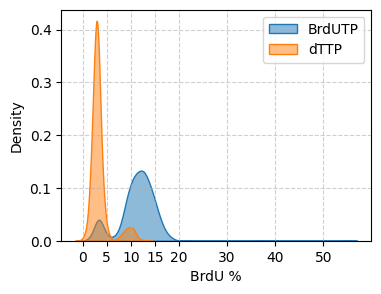

In [20]:
# Create the plot
#%matplotlib inline

plt.figure(figsize=(4, 3))

# Plot the first density plot
sns.kdeplot(brdu_perc_pYTB_BrdU['perc']*100, label='BrdUTP', fill=True, alpha=0.5)

# Plot the second density plot
sns.kdeplot(brdu_perc_pYTB_T['perc']*100, label='dTTP', fill=True, alpha=0.5)

# Add labels and title
plt.xlabel('BrdU %')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(np.array([0, 5, 10, 15, 20, 30, 40, 50]))

# Show the plot
plt.savefig('/content/drive/MyDrive/5-mer_data/Fig001.syn.mouse.5mers.retained.model.predicting.pTYB21.pdf')
plt.show()

In [9]:
my_drive = '/content/drive/MyDrive'
out_dir = os.path.join(my_drive, "5-mer_data")

## human HK293 cells cultured in BrdU-supplemented media (~20% BrdU subtitution rate by Mass Spectrometry)
brdu_dir = os.path.join(my_drive, "5-mer_data/barcode02")
pickle_files = os.listdir(brdu_dir)

brdu_perc_human_BrdU = {}
for p in pickle_files:
  with open(f'{brdu_dir}/{p}', 'rb') as file:
    X_test = pickle.load(file)
    predictions = model.predict(X_test, verbose=0)

    predictions_labels = np.apply_along_axis(softmax_to_label,  1, predictions)
    BrdU_percentage = np.sum(predictions_labels==1)/len(predictions_labels)
    #print(BrdU_percentage)
    brdu_perc_human_BrdU[p] = BrdU_percentage
with open(os.path.join(out_dir, '5mer.human.HK293.brdu.perc.pkl'), 'wb') as file:
  pickle.dump(brdu_perc_human_BrdU, file)

In [10]:
## mouse cell cultured in BrdU-free media
t_dir = os.path.join(my_drive, "5-mer_data/barcode01")
pickle_files = os.listdir(t_dir)

brdu_perc_mouse_T = {}
for p in pickle_files:
  with open(f'{t_dir}/{p}', 'rb') as file:
    X_test = pickle.load(file)
    predictions = model.predict(X_test, verbose=0)

    predictions_labels = np.apply_along_axis(softmax_to_label,  1, predictions)
    BrdU_percentage = np.sum(predictions_labels==1)/len(predictions_labels)
    #print(BrdU_percentage)
    brdu_perc_mouse_T[p] = BrdU_percentage
print(brdu_perc_mouse_T)
with open(os.path.join(out_dir,
                       '5mer.mouse.brdu-free.perc.pkl'), 'wb') as file:
  pickle.dump(brdu_perc_mouse_T, file)

{'ee283b82-24da-4279-bc7f-556f1cd55796.fast5.resquiggle.features.txt.pkl': np.float64(0.020380434782608696), 'ee298f05-8efc-46cd-a5dc-2e83a73626a8.fast5.resquiggle.features.txt.pkl': np.float64(0.02702702702702703), 'a24605b6-5e79-4ac0-a9f6-bba203b94667.fast5.resquiggle.features.txt.pkl': np.float64(0.028680304853590053), 'c6f803d7-5610-4735-8fdb-eb7a38380883.fast5.resquiggle.features.txt.pkl': np.float64(0.0364963503649635), 'ee2f9a92-89a2-4bac-881b-09fbeb9e2456.fast5.resquiggle.features.txt.pkl': np.float64(0.021821631878557873), 'd86cd304-665c-4ec2-9c99-ac9c4fa9c8ff.fast5.resquiggle.features.txt.pkl': np.float64(0.028813937904846997), 'd88f581e-e8b4-4b1b-86da-7b408273e96d.fast5.resquiggle.features.txt.pkl': np.float64(0.018518518518518517), 'ee486c2a-0774-404d-bab5-9922e9c5c292.fast5.resquiggle.features.txt.pkl': np.float64(0.02555366269165247), 'a2571010-38ba-428a-8e79-2df7b97a7d48.fast5.resquiggle.features.txt.pkl': np.float64(0.03912363067292645), 'b4b40dc8-441d-4a69-b5b1-4ae13e5

In [4]:
my_drive = '/content/drive/MyDrive'
out_dir = os.path.join(my_drive, "5-mer_data")

with open(os.path.join(out_dir, '5mer.human.HK293.brdu.perc.pkl'), 'rb') as file:
  brdu_perc_human_BrdU = pickle.load(file)

with open(os.path.join(out_dir,
                       '5mer.mouse.brdu-free.perc.pkl'), 'rb') as file:
  brdu_perc_mouse_T = pickle.load(file)

brdu_perc_human_BrdU = pd.DataFrame.from_dict(brdu_perc_human_BrdU, orient='index')
brdu_perc_human_BrdU.columns = ['perc']

brdu_perc_mouse_T = pd.DataFrame.from_dict(brdu_perc_mouse_T, orient='index')
brdu_perc_mouse_T.columns = ['perc']

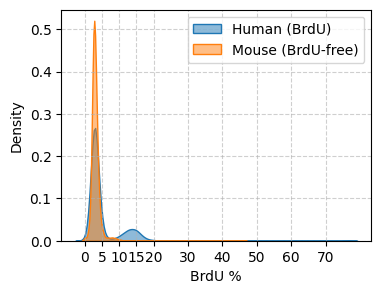

              perc
count  3486.000000
mean      0.049914
std       0.046539
min       0.000000
25%       0.025550
50%       0.031181
75%       0.042118
max       0.764706
              perc
count  3113.000000
mean      0.030716
std       0.014202
min       0.000000
25%       0.024291
50%       0.028742
75%       0.034224
max       0.462963


In [21]:
# Create the plot
# %matplotlib inline

plt.figure(figsize=(4, 3))

# Plot the first density plot
sns.kdeplot(brdu_perc_human_BrdU['perc']*100, label='Human (BrdU)', fill=True, alpha=0.5)

# Plot the second density plot
sns.kdeplot(brdu_perc_mouse_T['perc']*100, label='Mouse (BrdU-free)', fill=True, alpha=0.5)

# Add labels and title
plt.xlabel('BrdU %')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
# reset x-axis ticks
plt.xticks(np.array([0, 5, 10, 15, 20, 30, 40, 50, 60, 70]))

plt.savefig('/content/drive/MyDrive/5-mer_data/Fig001.syn.mouse.5mers.retained.model.predicting.human.mouse.BrdU.pdf')
plt.show()

print(brdu_perc_human_BrdU.describe())
print(brdu_perc_mouse_T.describe())

